In [1]:
from conf import databases, url, data_dir
from file_utils import create_folder
from dnn_helper import *

In [2]:
zeros = 0
ones = 0
for db, ids in databases:
    for i in ids:
        x, y = load_example(db, i, 360)
        assert len(x) == len(y)
        zeros += numpy.where(y==0.)[0].shape[0]
        ones += numpy.where(y==1.)[0].shape[0]
print(zeros, ones)

NameError: name 'load_example' is not defined

[[[ 0.]
  [ 0.]
  [ 0.]
  ..., 
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  ..., 
  [ 0.]
  [ 0.]
  [ 0.]]]


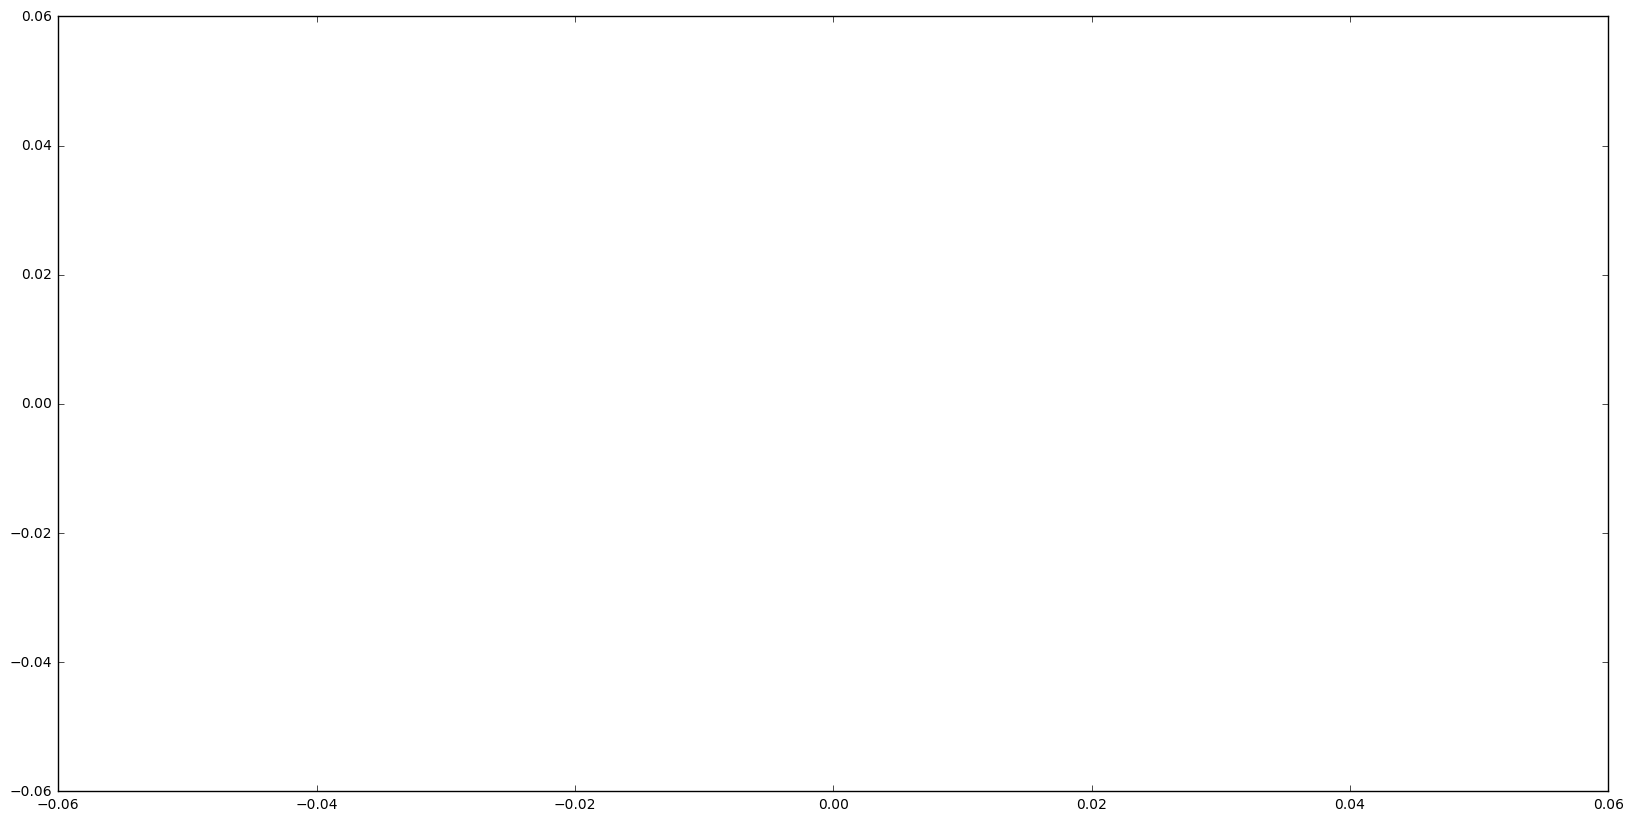

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time 

XY = load_steps('sddb', '30', 360, 5000, 2500, True, True)

plt.figure(figsize=(20, 10))
l = 100
u = 102

x = numpy.reshape(XY[l:u, 0], ((u-l)*5000,))
yw = numpy.where(numpy.reshape(XY[l:u, 1], ((u-l)*5000,))==1)[0]
print(XY[l:u, 1])
y = x[yw]
plt.plot(x)
plt.plot(yw, y, 'r+')
# plt.plot(numpy.reshape(XY[l:u, 1], ((u-l)*5000,)))
# plt.plot(x[:2000])
# plt.plot(y[:2000])
plt.show()


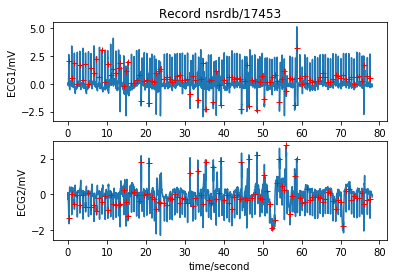

In [19]:
record = wfdb.rdsamp('data/dtdb/14184', sampto = 10000)
# print(record.d_signals)
ann = wfdb.rdann('data/ltdb/14184', 'atr', sampto = 10000)
wfdb.plotrec(record, annotation=ann, title='Record nsrdb/17453', timeunits = 'seconds', annch=[0, 1])


In [3]:
# t = 'data/sddb/49'
    
t = 'data/ltafdb/47'
sig, fields = wfdb.srdsamp(t, channels = [0, 1])
fs = fields['fs']
ann = wfdb.rdann(t, 'atr')
print(fields)

x = sig[:10000,0]

import time
t1 = time.time()
hard_peaks, soft_peaks = find_peaks(x)
print(time.time()-t1)
plt.figure(figsize=(20, 10))
plt.plot(x, 'y')
plt.plot(hard_peaks, x[hard_peaks], 'r+')
plt.plot(soft_peaks, x[soft_peaks], 'b+')
plt.plot()
plt.show()

y = numpy.zeros(len(sig))
y[ann.annsamp] = 1.0
y = y[:10000]

trained_fs = 360
min_bpm = 10
max_bpm = 350
min_gap = fs*60/min_bpm
max_gap = fs*60/max_bpm

y_idxs = compute_best_peak(x, y, min_gap, max_gap)
yy = numpy.where(y[:10000]==1)[0]
plt.figure(figsize=(20, 10))
plt.plot(x, 'b', label='ECG')
plt.plot(y_idxs, sig[y_idxs,0], 'm*', markersize=15, label='Corrected annotation')
plt.plot(yy, sig[yy,0], 'r*', markersize=10, label='Cardiologist annotation')
plt.plot(smooth(x, 150), 'y-', linewidth=3, label='Moving average')
plt.legend(numpoints=1)
plt.show()

{'fs': 128.0, 'signame': ['ECG', 'ECG'], 'comments': [], 'units': ['mV', 'mV']}


NameError: name 'find_peaks' is not defined

In [10]:

rpeaks = [1, 1, 0.5, 1, 0.9, 1,1,1,1,0.7,1, 0.5, 0.7, 0.9, 1,1, 0, 1, 0]
rpeaks_ranges = []
tmp = rpeaks[0] == 1
tmp_idx = 0
for i in range(1, len(rpeaks)-2):
    if tmp and rpeaks[i] > rpeaks[i+1]:
        rpeaks_ranges.append((tmp_idx, i))
        tmp = False
    elif not tmp and rpeaks[i] < 1.0 and rpeaks[i+1] == 1.0:
        tmp = True
        tmp_idx = i+1
print(rpeaks_ranges)

[(0, 1), (3, 3), (5, 8), (10, 10), (14, 15)]
